In [956]:
import pandas as pd
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\weather_prediction_dataset.csv")
df.head()

,Temperature,Humidity,Wind,Outlook,Weather
0,Hot,Medium,Weak,Rainy,Yes
1,Cold,Low,Strong,Overcast,Yes
2,Hot,Low,Weak,Overcast,Yes
3,Hot,High,Weak,Sunny,Yes
4,Cold,Low,Strong,Sunny,Yes


In [957]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  1600 non-null   object
 1   Humidity     1600 non-null   object
 2   Wind         1600 non-null   object
 3   Outlook      1600 non-null   object
 4   Weather      1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [958]:
df.duplicated().sum()

1492

In [959]:
df["Temperature"].unique()

array(['Hot', 'Cold', 'Mild'], dtype=object)

In [960]:
# from sklearn.preprocessing import LabelEncoder
# # Initialize lable encoder
# label_encoder = LabelEncoder()

# for i in df.columns:
#     df[i] = label_encoder.fit_transform(df[i])

In [961]:
df.head()

,Temperature,Humidity,Wind,Outlook,Weather
0,Hot,Medium,Weak,Rainy,Yes
1,Cold,Low,Strong,Overcast,Yes
2,Hot,Low,Weak,Overcast,Yes
3,Hot,High,Weak,Sunny,Yes
4,Cold,Low,Strong,Sunny,Yes


In [962]:
Temperature = {'Hot' : 2, 'Cold' : 0, 'Mild' : 1}
Humidity = {'Medium' : 1, 'Low' : 0, 'High' : 2}
Wind = {'Weak' : 0, 'Strong' : 1}
Outlook = {'Rainy' : 2, 'Overcast' : 1, 'Sunny' : 0}
Weather = {'Yes' : 1, 'No' : 0}

In [963]:
df["Temperature"] = df["Temperature"].map(Temperature)
df["Humidity"] = df["Humidity"].map(Humidity)
df["Outlook"] = df["Outlook"].map(Outlook)
df["Wind"] = df["Wind"].map(Wind)
df["Weather"] = df["Weather"].map(Weather)

In [964]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Weather"],axis = "columns"),df["Weather"],test_size = 0.2)

In [965]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1280
320
1280
320


Dataset is categorical

In [966]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()

In [967]:
model.fit(x_train,y_train)

CategoricalNB()

In [968]:
model.score(x_test,y_test)*100

54.37499999999999

In [969]:
y_predi = model.predict(x_test)

In [970]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predi)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[84 75]
 [71 90]]


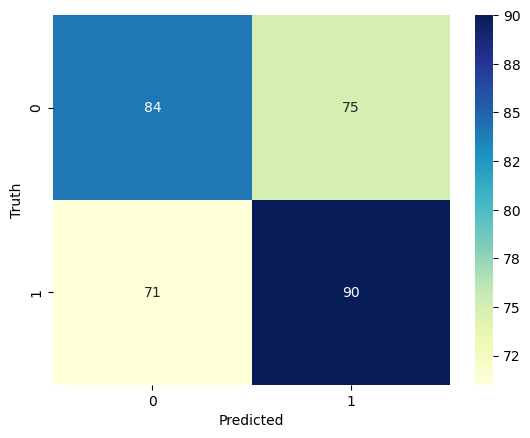

In [971]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt=".0f", cbar_kws={'format': '%.0f'},cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()